<img src="img/logo_FAO.png">

*L’Organisation pour l’alimentation et l’agriculture (FAO) est l’agence spécialisée des Nations Unies qui mène les efforts internationaux vers l’élimination de la faim. Notre objectif est d’atteindre la sécurité alimentaire pour tous et d’assurer un accès régulier et suffisant à une nourriture de bonne qualité permettant à tous, de mener une vie saine et active. Avec 195 membres - 194 pays et l'Union européenne, la FAO est active dans 130 pays à travers le monde.*

*Dans le présent rapport je vais vous présenter les résultats de l'étude sur l'état de la sous-nutrition dans le monde depuis 2013 ainsi que sur le Programme Alimentaire Mondial (PAM).*

In [1]:
#%run 1.Nettoyage.ipynb

# Chargement des librairies

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from mylib.fonction_pk import test_pk
import warnings
warnings.filterwarnings('ignore')

print("Version numpy : " + np.__version__)
print("Version pandas : " + pd.__version__)

bold = "\033[1m"
cyan = "\033[34m"
end = "\033[0;0m"

chemin_aide_alim = 'src/aide_alimentaire_cleaned.csv'
chemin_dispo_alim = 'src/dispo_alimentaire_cleaned.csv'
chemin_pop = 'src/population_cleaned.csv'
chemin_sous_nut = 'src/sous_nutrition_cleaned.csv'
chemin_iso = 'src/iso_gouv_cleaned.csv'

Version numpy : 1.23.5
Version pandas : 1.4.4


# Chargement des fichiers .csv

In [3]:
aide_alim = pd.read_csv(chemin_aide_alim)
dispo_alim = pd.read_csv(chemin_dispo_alim)
population = pd.read_csv(chemin_pop)
sous_nutrition = pd.read_csv(chemin_sous_nut)
iso = pd.read_csv(chemin_iso, sep=",")

# **Question 1**

## La formule de la disponibilité intérieure

<span style="color:#2a65c3">**disponibilité intérieure = production + importations + variations - exportations**</span>

<span style="color:#2a65c3">**disponibilité intérieure = nourriture + aliments animaux + semences + pertes + traitement + autres utilisations**</span>

# **Question 2** : L'utilisation des céréales

In [4]:
dispo_alim_cereales = dispo_alim.drop(columns=['Origine', 
                                               'Disponibilité alimentaire (Kcal/personne/jour)', 
                                               'Disponibilité alimentaire en quantité (kg/personne/an)', 
                                               'Disponibilité de matière grasse en quantité (g/personne/jour)', 
                                               'Disponibilité de protéines en quantité (g/personne/jour)',  
                                               'Exportations - Quantité', 
                                               'Importations - Quantité', 
                                               'Production', 
                                               'Variation de stock'])
values = ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres']
dispo_alim_cereales = dispo_alim_cereales[dispo_alim_cereales['Produit'].isin(values)]

In [5]:
part_alim_anim = round(dispo_alim_cereales['Aliments pour animaux'].sum() / dispo_alim_cereales['Disponibilité intérieure'].sum() * 100, 2)
print(bold + cyan + f"Les aliments pour animaux représentent {part_alim_anim} % de l'utilisation des céréales" + end)

Les aliments pour animaux représentent 36.29 % de l'utilisation des céréales


In [6]:
part_alim_nour = round(dispo_alim_cereales['Nourriture'].sum() / dispo_alim_cereales['Disponibilité intérieure'].sum() * 100, 2)
print(bold + cyan + f"Les aliments consacrés à l'alimentation humaine représentent {part_alim_nour} % de l'utilisation des céréales" + end)

Les aliments consacrés à l'alimentation humaine représentent 42.75 % de l'utilisation des céréales


In [7]:
proportion_alim_anim = round(dispo_alim_cereales['Aliments pour animaux'].sum() / (dispo_alim_cereales['Aliments pour animaux'].sum() 
                                                      + dispo_alim_cereales['Nourriture'].sum()) * 100, 2)
proportion_alim_nour = round(dispo_alim_cereales['Nourriture'].sum() / (dispo_alim_cereales['Aliments pour animaux'].sum() 
                                           + dispo_alim_cereales['Nourriture'].sum()) * 100, 2)
print(bold + cyan + f"En ne prenant en compte que l'utilisation de céréales pour l'alimentation humaine et animale la répartition entre les deux est de {proportion_alim_anim} % pour la part animale et de {proportion_alim_nour} % pour la part humaine" + end)

En ne prenant en compte que l'utilisation de céréales pour l'alimentation humaine et animale la répartition entre les deux est de 45.91 % pour la part animale et de 54.09 % pour la part humaine


# **Question 3** : La Thaïlande et l'utilisation du manioc

## La proportion de la population thaïlandaise en sous-nutrition

In [8]:
# le fichier fonction_pk.py qui sert à vérifier l'existence d'une clé unique est visible dans le dossier mylib
test_pk(population, ['Zone', 'Année'])

La clé est unique


In [9]:
pop_sous_nut = population.merge(sous_nutrition, how='inner', on=['Zone', 'Année'])

In [10]:
thailande = pop_sous_nut[pop_sous_nut['Zone'] == 'Thaïlande'].copy()
thailande['Proportion de la population en sous-nutrition'] = round(thailande['Population en sous-nutrition'] / thailande['Population'] * 100, 2)
thailande = thailande[['Zone', 'Année', 'Proportion de la population en sous-nutrition']]
print(bold + cyan + f"La proportion de la population thaïlandaise en sous-nutrition est de (en %):" + end)
thailande

La proportion de la population thaïlandaise en sous-nutrition est de (en %):


Zone  Année  Proportion de la population en sous-nutrition
1092  Thaïlande   2013                                           9.10
1093  Thaïlande   2014                                           8.77
1094  Thaïlande   2015                                           8.59
1095  Thaïlande   2016                                           8.70
1096  Thaïlande   2017                                           8.96
1097  Thaïlande   2018                                           9.36

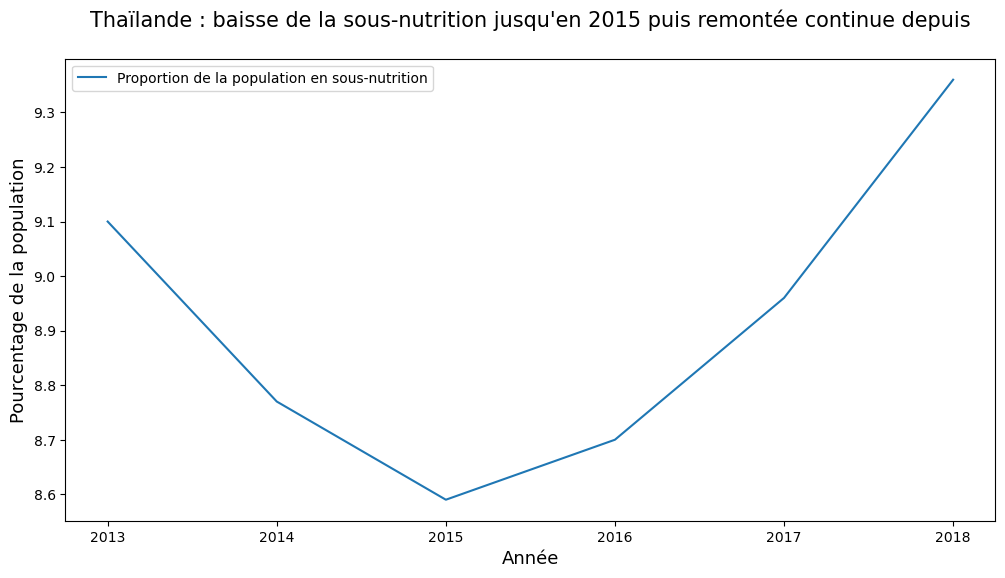

In [11]:
fig = thailande.plot.line(x='Année', y='Proportion de la population en sous-nutrition', figsize=(12, 6))
fig.set_title("Thaïlande : baisse de la sous-nutrition jusqu'en 2015 puis remontée continue depuis\n", fontsize=15)
fig.set_xlabel('Année', fontsize=13)
fig.set_ylabel('Pourcentage de la population', fontsize=13);

## Production de manioc

In [12]:
manioc_thailande = dispo_alim[dispo_alim['Zone'].isin(['Thaïlande'])&dispo_alim['Produit'].isin(['Manioc'])]

In [13]:
manioc_thailande_proportion = manioc_thailande['Exportations - Quantité'] / manioc_thailande['Production'] * 100
print(bold + cyan + f"{round(float(manioc_thailande_proportion), 2)} % de la production thaïlandaise de manioc est exportée" + end)

83.41 % de la production thaïlandaise de manioc est exportée


In [14]:
manioc_thailande_proportion_humain = manioc_thailande['Nourriture'] / manioc_thailande['Production'] * 100
print(bold + cyan + f"{round(float(manioc_thailande_proportion_humain), 2)} % de la production thaïlandaise de manioc est consacrée à l'alimentation humaine" + end)

2.88 % de la production thaïlandaise de manioc est consacrée à l'alimentation humaine


## Conclusion

+ <span style="color:#2a65c3">**Nous pouvons voir dans notre analyse qu'en 2013 la Thaïlande exporte la majeure partie de son manioc (83,41% de la production) et dédie 2,88% de sa production à l'alimentation humaine alors que 9,10% de sa population est en sous-nutrition cette même année**</span>


+ Cet état de fait s'explique par la stratégie des différents gouvernements thaïlandais.


+ En effet avec une industrie agroalimentaire qui a fortement progressé en Thaïlande dès les années 1980 et 1990, le commerce agroalimentaire est structurellement excédentaire depuis plusieurs décennies et s'est tourné vers le développement des exportations. Notamment, la Thaïlande est le 2ème producteur mondial de manioc derrière le Nigeria et devant le Brésil et l’Indonésie (2016).


+ L’agriculture représente en Thaïlande 8,7 % du PIB en 2016 et emploie un tiers de la population active. La FAO estime que les terres agricoles occupent 43 % du territoire national.


+ En raison de l’importance de ces terres agricoles et de conditions climatiques favorables, la question de l’autosuffisance alimentaire ne s’est jamais posée pour la Thaïlande qui, historiquement, bénéficie d’une production de biens agricoles excédant sa consommation intérieure. En outre, le développement de l’agriculture a permis de faire progressivement diminuer le prix de l’alimentation au fil des décennies, en particulier du riz, contribuant ainsi à l’amélioration de la sécurité alimentaire dans le pays. Désormais, la disponibilité et l’accès à la nourriture ne sont plus un problème pour une très large majorité de ménages, même si le rythme de progression de la sécurité alimentaire dans le pays s’est ralenti depuis plusieurs années. Au niveau national, le taux de prévalence de la sous-nutrition se situe à un niveau de 8,7 % en 2016.



+ Il est également à noter que le secteur agricole thaïlandais est entré ces dernières années dans une période de turbulence qui touche plusieurs piliers de sa réussite :
        1. la filière riz (sécheresse et déficit de compétitivité)
        2. le caoutchouc (faiblesse du cours)
        3. les filières sucre et pêche (confrontées à la question de la durabilité des organisations/pratiques)


+ Pour y remédier, la Thaïlande entend poursuivre le développement de son secteur agroalimentaire et son orientation vers l’export, avec l’objectif de devenir la « Cuisine du Monde ». Le gouvernement militaire a initié début 2016 un certain nombre de réformes dans le secteur agricole, qui s’intègrent dans la stratégie « Thaïland 4.0 ». Celle-ci vise à développer l’innovation et la valeur ajoutée dans l’économie afin que le pays sorte de son statut de pays à revenu intermédiaire.

# **Question 4**

## Part de la population mondiale en sous-nutrition

In [15]:
pop_sous_nut_2017 = pop_sous_nut[pop_sous_nut['Année'] == 2017].copy()

In [16]:
proportion_pop_sous_nut_2017 = round(pop_sous_nut_2017['Population en sous-nutrition'].sum() / pop_sous_nut_2017['Population'].sum() * 100, 2)
print(bold + cyan + f"En 2017 la proportion de la population mondiale en sous-nutrition est de {proportion_pop_sous_nut_2017} %" + end)

En 2017 la proportion de la population mondiale en sous-nutrition est de 7.11 %


# **Question 5**

## Le nombre théorique de personnes qui pourraient être nourries dans le monde

In [17]:
population_2013 = population[population['Année'] == 2013].copy()

In [18]:
test_pk(population_2013, 'Zone')

La clé est unique


In [19]:
dispo_alim_pop_2013 = dispo_alim.merge(population_2013, on='Zone', how='inner')
dispo_kcal_par_pays_2013 = dispo_alim_pop_2013['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alim_pop_2013['Population']
dispo_kcal_mondiale_2013 = dispo_kcal_par_pays_2013.sum()
nombre_pers = dispo_kcal_mondiale_2013 / 2500
print(bold + cyan + f"La disponibilité mondiale journalière est de {dispo_kcal_mondiale_2013} Kcal\n" + end)
print(bold + cyan + f"Le nombre théorique de personnes qui pourraient être nourries est de {int(nombre_pers)}\n" + end)
population_mondiale_2013 = population_2013['Population'].sum()
part_totale = nombre_pers / population_mondiale_2013 *100
print(bold + cyan + f"Soit {round(part_totale, 2)} % de la population mondiale en 2013" + end)

La disponibilité mondiale journalière est de 20301392554468.0 Kcal

Le nombre théorique de personnes qui pourraient être nourries est de 8120557021

Soit 112.62 % de la population mondiale en 2013


# **Question 6**

## Le nombre théorique de personnes qui pourraient être nourries dans le monde rien qu'avec les produits d'origine végétale

In [20]:
dispo_vegetale_par_pays_2013 = dispo_alim_pop_2013[dispo_alim_pop_2013['Origine'] == 'vegetale']
dispo_kcal_vegetale_par_pays_2013 = dispo_vegetale_par_pays_2013['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_vegetale_par_pays_2013['Population']
dispo_kcal_vegetale_mondiale_2013 = dispo_kcal_vegetale_par_pays_2013.sum()
nombre_pers = dispo_kcal_vegetale_mondiale_2013 / 2500
print(bold + cyan + f"La disponibilité mondiale journalière d'origine végétale est de {dispo_kcal_vegetale_mondiale_2013} Kcal\n" + end)
print(bold + cyan + f"Le nombre théorique de personnes qui pourraient être nourries avec les produits végétaux est de {int(nombre_pers)}\n" + end)
part_vegetale = nombre_pers / population_mondiale_2013 *100
print(bold + cyan + f"Soit {round(part_vegetale, 2)} % de la population mondiale en 2013" + end)

La disponibilité mondiale journalière d'origine végétale est de 16691028096110.0 Kcal

Le nombre théorique de personnes qui pourraient être nourries avec les produits végétaux est de 6676411238

Soit 92.59 % de la population mondiale en 2013


# **Question 7** : Utilisation de la disponibilité intérieure (2013)

## Part qui est attribuée à l'alimentation animale

In [21]:
part_aliment_animaux = round(dispo_alim['Aliments pour animaux'].sum() / dispo_alim['Disponibilité intérieure'].sum() * 100, 2)
print(bold + cyan + f"La part de la disponibilité intérieure qui est attribuée à l'alimentation animale est de {part_aliment_animaux} %" + end)

La part de la disponibilité intérieure qui est attribuée à l'alimentation animale est de 13.24 %


## Part qui est perdue

In [22]:
part_aliment_perdu = round(dispo_alim['Pertes'].sum() / dispo_alim['Disponibilité intérieure'].sum() * 100, 2)
print(bold + cyan + f"La part de la disponibilité intérieure qui est perdue est de {part_aliment_perdu} %" + end)

La part de la disponibilité intérieure qui est perdue est de 4.61 %


## Part qui est utilisée pour l'alimentation humaine

In [23]:
part_aliment_humain = round(dispo_alim['Nourriture'].sum() / dispo_alim['Disponibilité intérieure'].sum() * 100, 2)
print(bold + cyan + f"La part de la disponibilité intérieure utilisée pour les humains est de {part_aliment_humain} %" + end)

La part de la disponibilité intérieure utilisée pour les humains est de 49.51 %


## Autres utilisations

In [24]:
semences = round(dispo_alim['Semences'].sum() / dispo_alim['Disponibilité intérieure'].sum() * 100, 2)
traitement = round(dispo_alim['Traitement'].sum() / dispo_alim['Disponibilité intérieure'].sum() * 100, 2)
autres_utilisations = round(dispo_alim['Autres Utilisations'].sum() / dispo_alim['Disponibilité intérieure'].sum() * 100, 2)
print(bold + cyan + f"La part de la disponibilité intérieure utilisée pour les semences est de {semences} %" + end)
print(bold + cyan + f"La part de la disponibilité intérieure utilisée pour les traitements est de {traitement} %" + end)
print(bold + cyan + f"La part de la disponibilité intérieure utilisée pour les autres utilisations est de {autres_utilisations} %" + end)

La part de la disponibilité intérieure utilisée pour les semences est de 1.57 %
La part de la disponibilité intérieure utilisée pour les traitements est de 22.38 %
La part de la disponibilité intérieure utilisée pour les autres utilisations est de 8.78 %


## Visualisation de la répartition des différentes utilisations de la disponibilité intérieure 

In [25]:
data = [[part_aliment_animaux], 
        [part_aliment_perdu], 
        [part_aliment_humain],
        [semences + traitement + autres_utilisations]]

df = pd.DataFrame(data, columns=[''], index=['Aliments pour animaux', 
                                             'Aliments perdus',
                                             'Aliments pour humains',
                                             'Autres utilisations'])

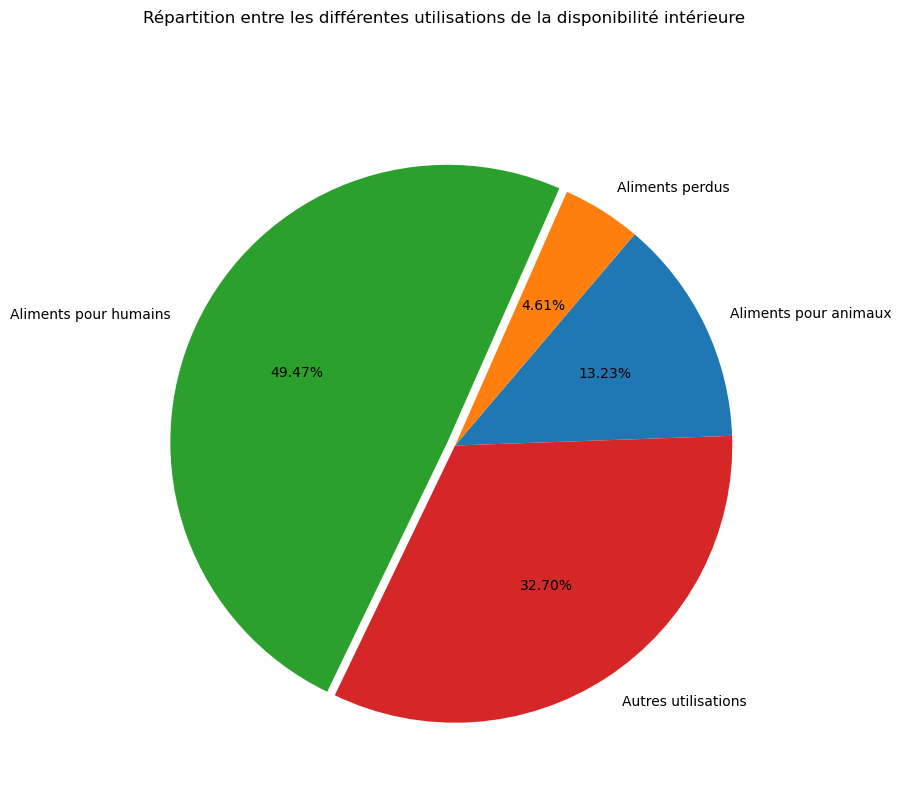

In [26]:
fig = df.plot.pie(title='Répartition entre les différentes utilisations de la disponibilité intérieure', 
                 subplots=True, figsize=(9, 9), autopct='%1.2f%%', legend=False, startangle=2, 
                  explode=(0, 0, 0.03, 0))

# **Question 8** : Sous-alimentation dans le monde

## Pays avec la plus forte proportion de personnes sous-alimentées en 2017

In [27]:
pop_sous_nut['Proportion population en sous-nutrition'] = round(pop_sous_nut['Population en sous-nutrition'] / pop_sous_nut['Population'] * 100, 2)

In [28]:
pop_sous_nut_2017['Proportion population en sous-nutrition'] = round(pop_sous_nut_2017['Population en sous-nutrition'] / pop_sous_nut_2017['Population'] * 100, 2)
pop_sous_nut_2017 = pop_sous_nut_2017.sort_values(by='Proportion population en sous-nutrition', ascending=False)
print(bold + cyan + f"Les 10 pays où la proportion des personnes sous-alimentées est plus la forte en 2017 sont :\n" + end)
pop_sous_nut_2017.head(10)

Les 10 pays où la proportion des personnes sous-alimentées est plus la forte en 2017 sont :



Zone  Année  Population  \
460                                        Haïti   2017  10982366.0   
934   République populaire démocratique de Corée   2017  25429825.0   
640                                   Madagascar   2017  25570512.0   
610                                      Libéria   2017   4702226.0   
592                                      Lesotho   2017   2091534.0   
1084                                       Tchad   2017  15016753.0   
958                                       Rwanda   2017  11980961.0   
718                                   Mozambique   2017  28649018.0   
1102                                 Timor-Leste   2017   1243258.0   
4                                    Afghanistan   2017  36296113.0   

      Population en sous-nutrition  Proportion population en sous-nutrition  
460                      5300000.0                                    48.26  
934                     12000000.0                                    47.19  
640                     10500000.0                                    41.06  
610                      1800000.0                                    38.28  
592                       800000.0                                    38.25  
1084                     5700000.0                                    37.96  
958                      4200000.0                                    35.06  
718                      9400000.0                                    32.81  
1102                      400000.0                                    32.17  
4                       10500000.0                                    28.93

## Représentation de la proportion de personnes sous-alimentées par pays entre 2013 et 2018

In [29]:
test_pk(iso, 'Zone')

La clé est unique


In [30]:
iso_pop_sous_nut = iso.merge(pop_sous_nut, how='inner', on='Zone')

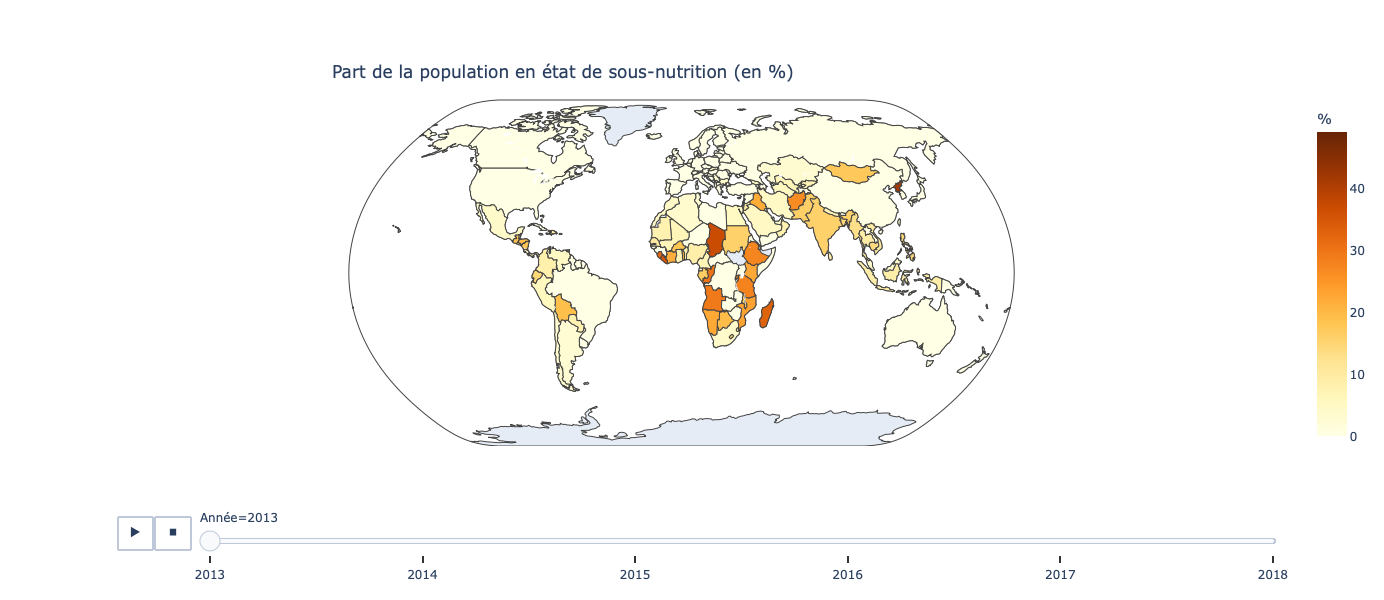

In [31]:
fig = px.choropleth(iso_pop_sous_nut, locations="CODE", 
              color="Proportion population en sous-nutrition", 
              color_continuous_scale=px.colors.sequential.YlOrBr, 
              hover_name="Zone", 
              projection="natural earth",
              title="Part de la population en état de sous-nutrition (en %)", 
              animation_frame="Année")
fig.update_layout(title_x=0.24, title_y=0.89)
fig.update_layout(coloraxis_colorbar_title='%')
fig.update_layout(width=900, height=600)
fig.add_layout_image(dict(
        source="logo_FAO.png",
        xref="paper", yref="paper",
        x=0.65, y=1.15,
        sizex=0.3, sizey=0.3,
        xanchor="right", yanchor="bottom"))

# **Question 9** : Aide alimentaire

## Pays qui ont le plus bénéficié d'aide depuis 2013

In [32]:
aide_alim_depuis_2013 = aide_alim.groupby('Zone').sum('Quantité').sort_values('Quantité', ascending=False)
aide_alim_depuis_2013 = aide_alim_depuis_2013.drop(columns='Année')
aide_alim_depuis_2013 = aide_alim_depuis_2013.reset_index()
aide_alim_depuis_2013["Proportion de l'aide alimentaire"] = round(aide_alim_depuis_2013['Quantité'] / aide_alim_depuis_2013['Quantité'].sum() * 100, 2)
print(bold + cyan + f"Les 10 pays ayant le plus bénéficié de l'aide alimentaire depuis 2013 sont :\n" + end)
aide_alim_depuis_2013.head(10)

Les 10 pays ayant le plus bénéficié de l'aide alimentaire depuis 2013 sont :



Zone    Quantité  \
0         République arabe syrienne  1858943000   
1                          Éthiopie  1381294000   
2                             Yémen  1206484000   
3                     Soudan du Sud   695248000   
4                            Soudan   669784000   
5                             Kenya   552836000   
6                        Bangladesh   348188000   
7                           Somalie   292678000   
8  République démocratique du Congo   288502000   
9                             Niger   276344000   

   Proportion de l'aide alimentaire  
0                             16.84  
1                             12.52  
2                             10.93  
3                              6.30  
4                              6.07  
5                              5.01  
6                              3.16  
7                              2.65  
8                              2.61  
9                              2.50

## Représentation de la proportion des aides alimentaires par pays depuis 2013

In [33]:
test_pk(aide_alim_depuis_2013, 'Zone')

La clé est unique


In [34]:
iso_aide_depuis_2013 = iso.merge(aide_alim_depuis_2013, how='inner', on='Zone')

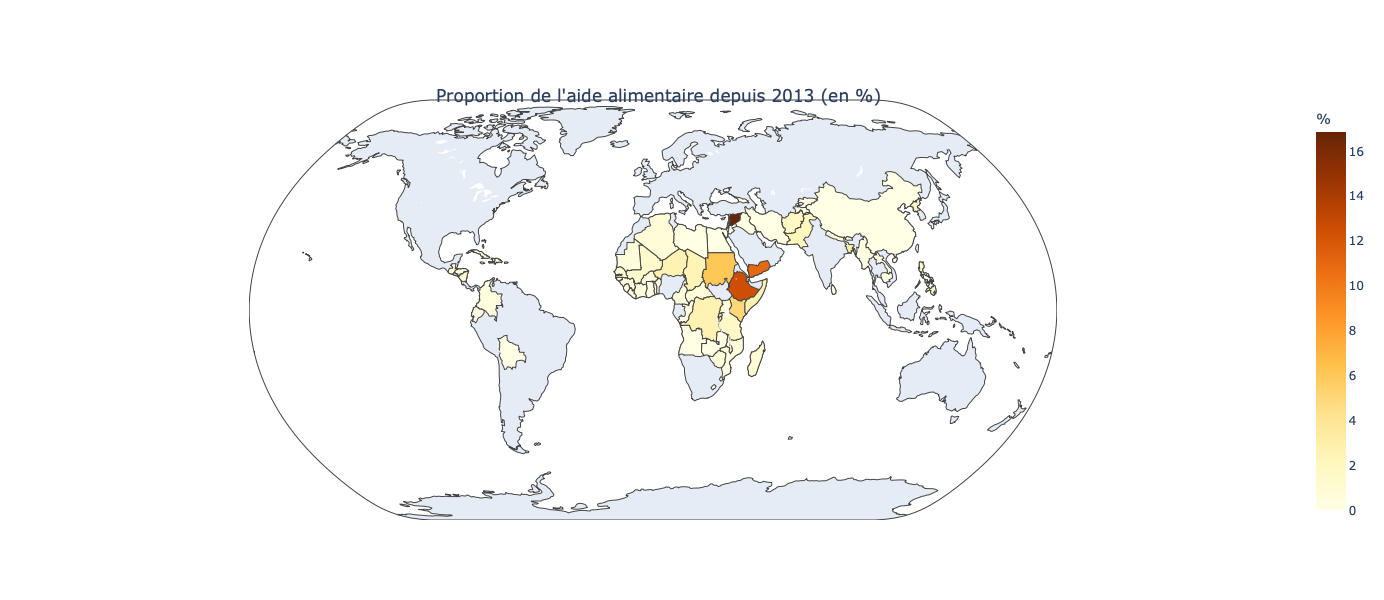

In [35]:
fig = px.choropleth(iso_aide_depuis_2013, locations="CODE", 
              color="Proportion de l'aide alimentaire", 
              color_continuous_scale=px.colors.sequential.YlOrBr, 
              hover_name="Zone", 
              projection="natural earth",
              title="Proportion de l'aide alimentaire depuis 2013 (en %)")
fig.update_layout(coloraxis_colorbar_x=1.07)
fig.update_layout(title_x=0.476, title_y=0.85)
fig.update_layout(coloraxis_colorbar_title='%')
fig.update_layout(width=900, height=600)
fig.add_layout_image(dict(
        source="logo_FAO.png",
        xref="paper", yref="paper",
        x=0.65, y=1.08,
        sizex=0.3, sizey=0.3,
        xanchor="right", yanchor="bottom"))

# **Question 10** : Analyse complémentaire

## Relation entre sous-alimentation et aide alimentaire

In [36]:
pop_sous_nut_depuis_2013 = pop_sous_nut.groupby('Zone').mean('Population en sous-nutrition')
pop_sous_nut_depuis_2013['Proportion population en sous-nutrition'] = round(pop_sous_nut_depuis_2013['Population en sous-nutrition'] / pop_sous_nut_depuis_2013['Population'] * 100, 2)
pop_sous_nut_depuis_2013 = pop_sous_nut_depuis_2013.reset_index()
pop_sous_nut_depuis_2013.sort_values(by=['Proportion population en sous-nutrition'], ascending=False, inplace=True)
pop_sous_nut_depuis_2013.drop(columns=['Année'], inplace=True)

In [37]:
test_pk(pop_sous_nut_depuis_2013, 'Zone')

La clé est unique


In [38]:
pop_sous_nut_aide_alim_depuis_2013 = pop_sous_nut_depuis_2013.merge(aide_alim_depuis_2013, how='inner', on='Zone')

In [39]:
pop_sous_nut_aide_alim_depuis_2013 = pop_sous_nut_aide_alim_depuis_2013[pop_sous_nut_aide_alim_depuis_2013['Population en sous-nutrition'] != 0]
#pop_sous_nut_aide_alim_depuis_2013.sort_values(by="Proportion de l'aide alimentaire", ascending=False).head(10)

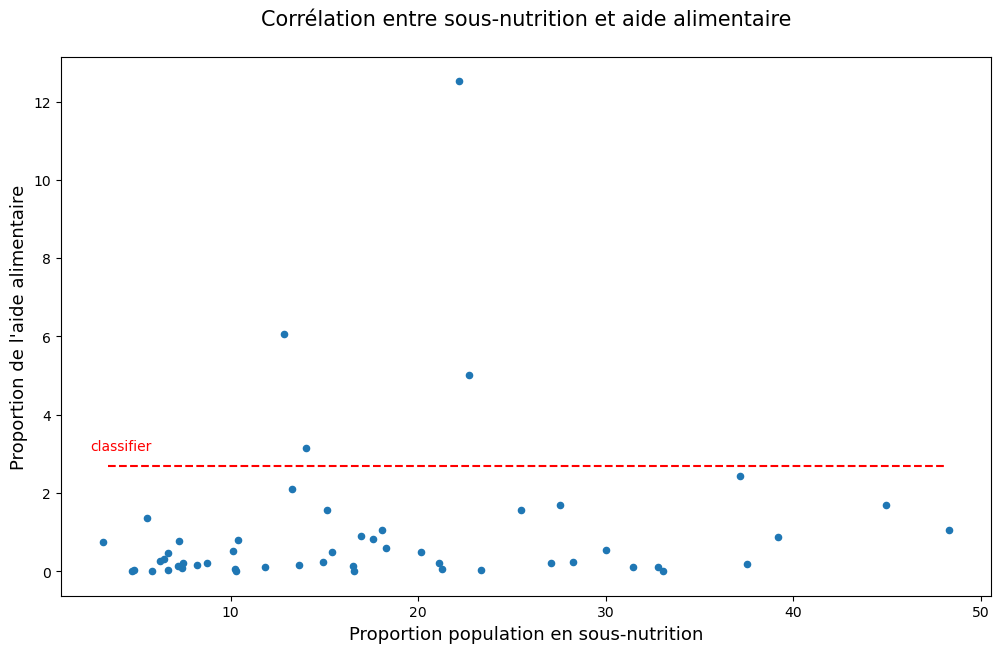

In [40]:
x = 'Proportion population en sous-nutrition'
y = "Proportion de l'aide alimentaire"
ax = pop_sous_nut_aide_alim_depuis_2013.plot.scatter(x, y, figsize=(12, 7))
ax.set_title("Corrélation entre sous-nutrition et aide alimentaire\n", fontsize=15)
ax.set_xlabel(x, fontsize=13)
ax.set_ylabel(y, fontsize=13)
ax.axhline(y=2.7, xmin=0.05, xmax=0.95, color="red", linestyle="--")
ax.text(x=2.5, y=3.1, s="classifier", color="red");

<span style="color:#2a65c3">**Nous pouvons voir que 4 pays se détachent avec des valeurs allant de 3.16 % à 12.5%, tandis que les autres ont reçu moins de 2.5 % du PAM**</span>

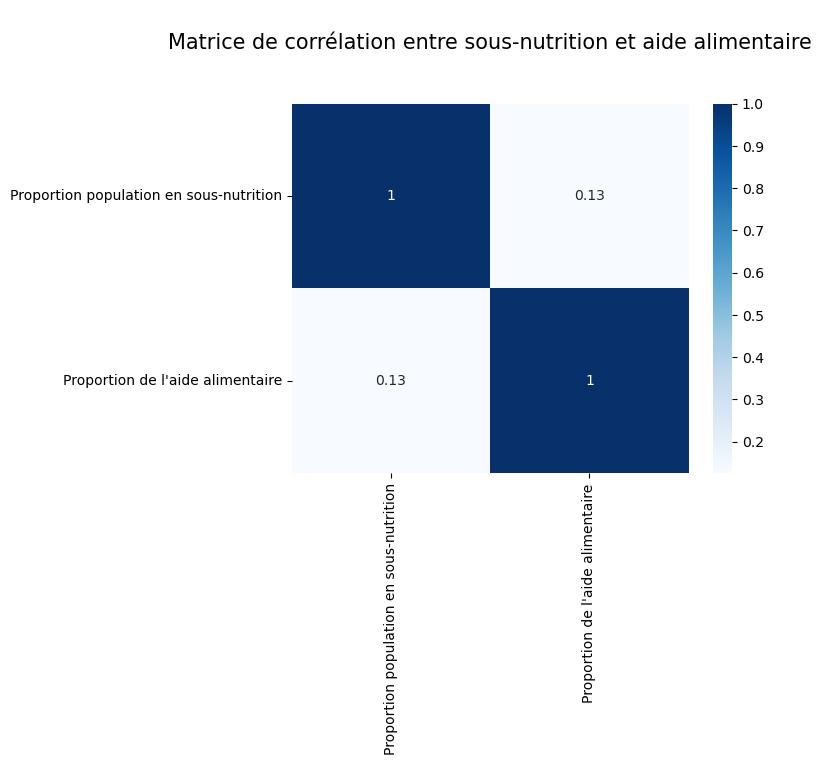

La corrélation entre sous-nutrition et aide alimentaire est de l'ordre de 0.13



In [41]:
sns.heatmap(pop_sous_nut_aide_alim_depuis_2013[[x, y]].corr(), annot=True, cmap='Blues')
plt.title("\nMatrice de corrélation entre sous-nutrition et aide alimentaire\n\n", fontsize=15)
plt.show()
print(bold + cyan + f"La corrélation entre sous-nutrition et aide alimentaire est de l'ordre de 0.13\n" + end) 

## Conclusion

+ <span style="color:#2a65c3">**Nous pouvons ainsi remarquer que la corrélation entre sous-nutrition et aide alimentaire est très faible, ce qui induit que les pays avec la population la plus sous-nutrie ne sont pas ceux qui recoivent le plus d'aide**</span> 


+ Ceci s'explique par le fonctionnement de l'aide alimentaire, l'idée première du programme lors de sa création en 1961 était bien d'alimenter les pays en développement souffrant de la faim, par les surplus alimentaires des pays développés. Tout d'abord voué à être un programme humanitaire temporaire de trois ans, il devient depuis 1965 un programme permanent de l'ONU et de la FAO


+ Dorénavant la mission du Programme Alimentaire Mondial est d'éliminer la faim et la pauvreté dans le monde, en répondant aux besoins d'urgence et en appuyant le développement économique et social en fournissant une aide alimentaire aux :

     1. **victimes de catastrophes naturelles**
     2. **personnes réfugiées** ou déplacées à l'intérieur de leur propre pays – contraintes de tout abandonner à la suite de conflits, d'inondations, de sécheresses ou d'autres catastrophes naturelles
     3. **pauvres souffrant de la faim** qui n'arrivent pas à se sortir du cercle vicieux de la pauvreté et de la malnutrition


+ Et visant également à :

     1. **réduire le taux de mortalité infantile**
     2. **améliorer la santé des femmes enceintes**
     3. **lutter contre la carence de micronutriments**
     4. **lutter contre les maladies comme le VIH/SIDA**
     

+ Suite à ces engagements, le Programme Alimentaire Mondial a d'ailleurs reçu le prix Nobel de la paix 2020 « pour ses **efforts de lutte contre la faim**, pour sa contribution à **l'amélioration des conditions de paix dans les zones touchées par les conflits** et pour avoir joué un rôle moteur dans les **efforts visant à empêcher l'utilisation de la faim comme arme de guerre** »

In [42]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# **Question 11** : Disponibilité par habitant (2013)

In [43]:
dispo_alim_hab = dispo_alim.copy()
dispo_alim_hab = dispo_alim_hab.groupby('Zone').sum()
dispo_alim_hab = dispo_alim_hab.reset_index()

## ***Disponibilité intérieure par pays***

### Répartition de la disponibilité intérieure dans le monde

In [44]:
iso_dispo_alim = iso.merge(dispo_alim_hab, how='inner', on='Zone')

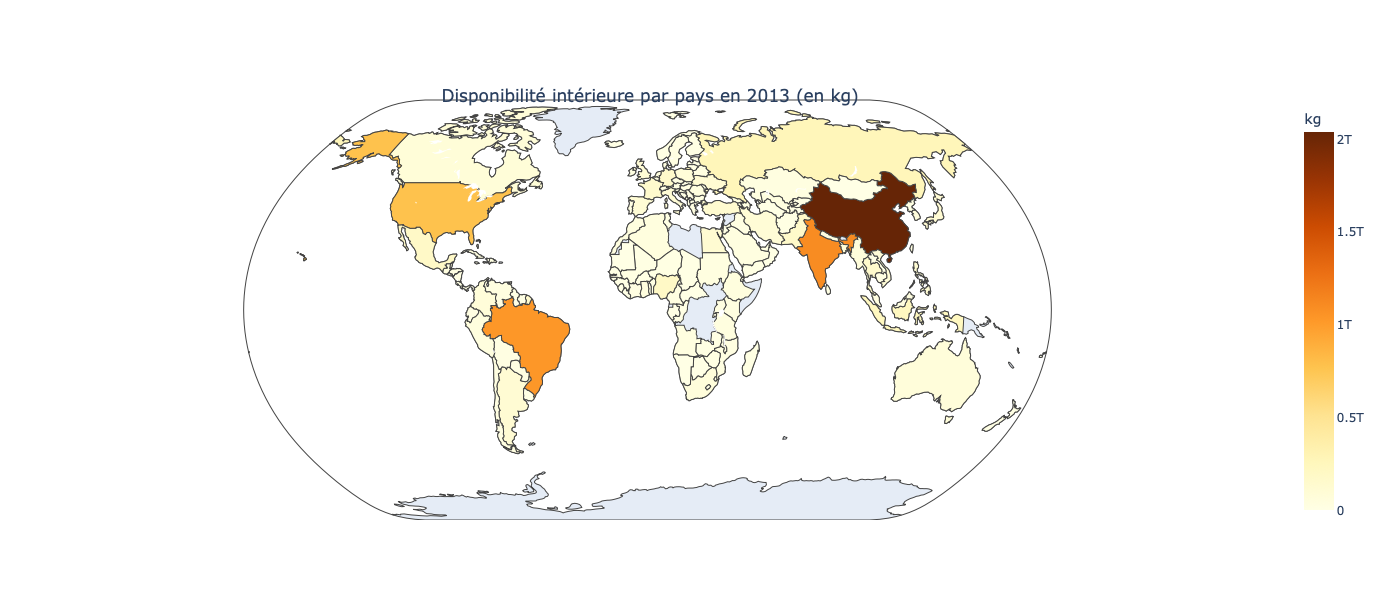

In [45]:
fig = px.choropleth(iso_dispo_alim, locations="CODE", 
              color="Disponibilité intérieure", 
              color_continuous_scale=px.colors.sequential.YlOrBr, 
              hover_name="Zone", 
              projection="natural earth",
              title="Disponibilité intérieure par pays en 2013 (en kg)")
fig.update_layout(coloraxis_colorbar_x=1.07)
fig.update_layout(title_x=0.47, title_y=0.85)
fig.update_layout(coloraxis_colorbar_title='kg')
fig.update_layout(width=900, height=600)
fig.add_layout_image(dict(
        source="logo_FAO.png",
        xref="paper", yref="paper",
        x=0.65, y=1.08,
        sizex=0.3, sizey=0.3,
        xanchor="right", yanchor="bottom"))

## ***Kcal***

### Pays ayant le plus de disponibilité par habitant (Kcal)

In [46]:
classement_dispo_cal = dispo_alim_hab.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)
print(bold + cyan + f"Les 10 pays ayant le plus de disponibilité (Kcal) par habitant sont :\n" + end)
classement_dispo_cal.head(10)

Les 10 pays ayant le plus de disponibilité (Kcal) par habitant sont :



Zone  Aliments pour animaux  Autres Utilisations  \
11                Autriche          3412000000.00        1001000000.00   
16                Belgique          5533000000.00        3226000000.00   
159                Turquie         17750000000.00        3006000000.00   
171  États-Unis d'Amérique        148432000000.00      154699000000.00   
73                  Israël          2525000000.00         801000000.00   
71                 Irlande          3758000000.00        1120000000.00   
74                  Italie         16144000000.00        3228000000.00   
88              Luxembourg           147000000.00          11000000.00   
168                 Égypte         15084000000.00        2262000000.00   
4                Allemagne         30209000000.00        7711000000.00   

     Disponibilité alimentaire (Kcal/personne/jour)  \
11                                          3770.00   
16                                          3737.00   
159                                         3708.00   
171                                         3682.00   
73                                          3610.00   
71                                          3602.00   
74                                          3578.00   
88                                          3540.00   
168                                         3518.00   
4                                           3503.00   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
11                                             1069.20        
16                                             1002.09        
159                                             968.15        
171                                            1002.39        
73                                              922.14        
71                                             1150.15        
74                                              993.20        
88                                             1150.66        
168                                             803.79        
4                                               957.52        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
11                                              170.44               
16                                              161.95               
159                                             119.64               
171                                             161.37               
73                                              151.39               
71                                              125.69               
74                                              154.69               
88                                              141.49               
168                                              63.09               
4                                               141.62               

     Disponibilité de protéines en quantité (g/personne/jour)  \
11                                              106.20          
16                                               99.37          
159                                             108.12          
171                                             109.42          
73                                              128.00          
71                                              109.91          
74                                              108.49          
88                                              113.64          
168                                             103.22          
4                                               101.39          

     Disponibilité intérieure  Exportations - Quantité  \
11             19308000000.00            6733000000.00   
16             29358000000.00           30345000000.00   
159           131377000000.00           14593000000.00   
171           777992000000.00          163524000000.00   
73             11267000000.00            1648000000.00   
71             10738000000.00            6828000000.00   
74            

### Pays ayant le moins de disponibilité par habitant (Kcal)

In [47]:
classement_dispo_cal_asc = dispo_alim_hab.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True)
print(bold + cyan + f"Les 10 pays ayant le moins de disponibilité (Kcal) par habitant sont :\n" + end)
classement_dispo_cal_asc.head(10)

Les 10 pays ayant le moins de disponibilité (Kcal) par habitant sont :



Zone  Aliments pour animaux  \
128                   République centrafricaine             1000000.00   
166                                      Zambie           408000000.00   
91                                   Madagascar           842000000.00   
0                                   Afghanistan           768000000.00   
63                                        Haïti           481000000.00   
133  République populaire démocratique de Corée           816000000.00   
151                                       Tchad           104000000.00   
167                                    Zimbabwe           131000000.00   
114                                     Ouganda           348000000.00   
154                                 Timor-Leste             9000000.00   

     Autres Utilisations  Disponibilité alimentaire (Kcal/personne/jour)  \
128          27000000.00                                         1879.00   
166          69000000.00                                         1924.00   
91         2522000000.00                                         2056.00   
0           415000000.00                                         2087.00   
63          115000000.00                                         2089.00   
133         695000000.00                                         2093.00   
151           2000000.00                                         2109.00   
167          23000000.00                                         2113.00   
114          68000000.00                                         2126.00   
154           2000000.00                                         2129.00   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
128                                             453.73        
166                                             350.12        
91                                              425.07        
0                                               351.41        
63                                              397.78        
133                                             458.93        
151                                             319.45        
167                                             336.59        
114                                             535.58        
154                                             369.10        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
128                                              59.41               
166                                              42.05               
91                                               24.49               
0                                                33.50               
63                                               48.92               
133                                              36.41               
151                                              47.10               
167                                              57.18               
114                                              46.57               
154                                              51.08               

     Disponibilité de protéines en quantité (g/personne/jour)  \
128                                              46.04          
166                                              55.22          
91                                               46.69          
0                                                58.26          
63                                               47.70          
133                                              54.99          
151                                              62.75          
167                                              48.32          
114                                              52.64          
154                                              57.51          

     Disponibilité intérieure  Exportations - Quantité  \
128             2582000000.00                     0.00   
166            10041000000.00             675000000.00   
91             15216000000.00       

### Représentation de la disponibilité en Kcal par pays en 2013

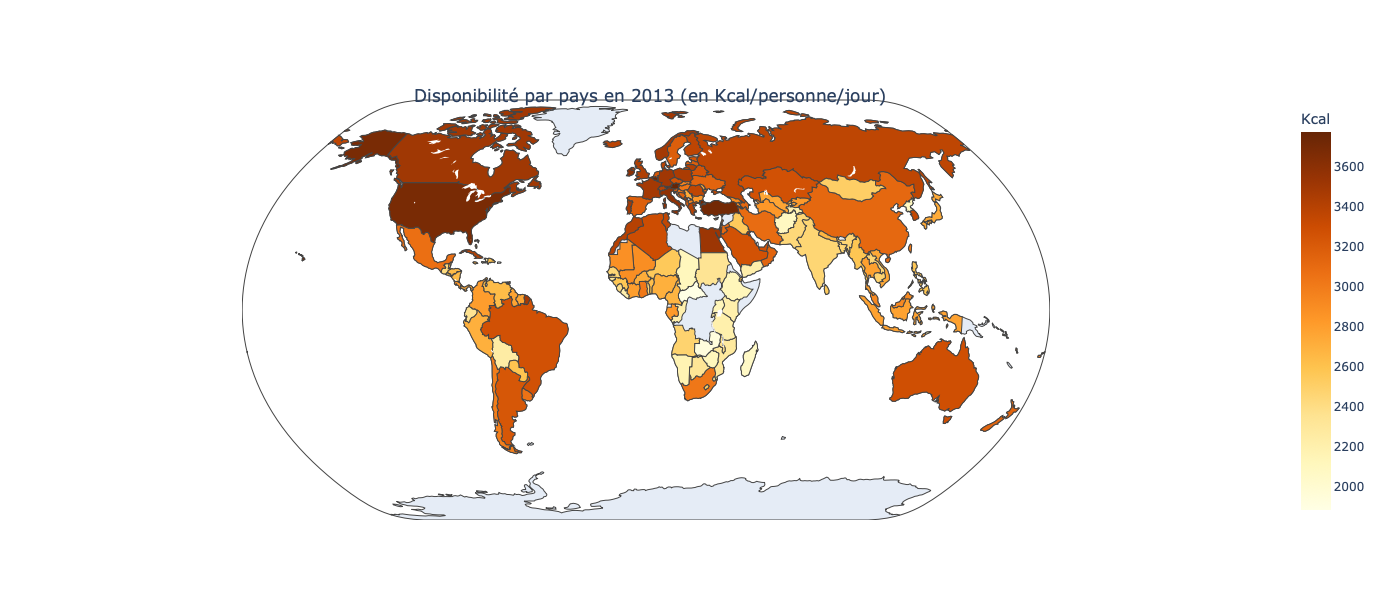

In [48]:
fig = px.choropleth(iso_dispo_alim, locations="CODE", 
              color="Disponibilité alimentaire (Kcal/personne/jour)", 
              color_continuous_scale=px.colors.sequential.YlOrBr, 
              hover_name="Zone", 
              projection="natural earth",
              title="Disponibilité par pays en 2013 (en Kcal/personne/jour)")
fig.update_layout(coloraxis_colorbar_x=1.07)
fig.update_layout(title_x=0.47, title_y=0.85)
fig.update_layout(coloraxis_colorbar_title='Kcal')
fig.update_layout(width=900, height=600)
fig.add_layout_image(dict(
        source="logo_FAO.png",
        xref="paper", yref="paper",
        x=0.65, y=1.08,
        sizex=0.3, sizey=0.3,
        xanchor="right", yanchor="bottom"))

## ***Kg***

### Pays ayant le plus de disponibilité par habitant (kg)

In [49]:
classement_dispo_kg = dispo_alim_hab.sort_values(by='Disponibilité alimentaire en quantité (kg/personne/an)', ascending=False)
print(bold + cyan + f"Les 10 pays ayant le plus de disponibilité (kg) par habitant sont :\n" + end)
classement_dispo_kg.head(10)

Les 10 pays ayant le plus de disponibilité (kg) par habitant sont :



Zone  Aliments pour animaux  Autres Utilisations  \
102  Monténégro           173000000.00          21000000.00   
88   Luxembourg           147000000.00          11000000.00   
71      Irlande          3758000000.00        1120000000.00   
2       Albanie           660000000.00         174000000.00   
50     Finlande          2154000000.00         641000000.00   
57        Grèce          4453000000.00        1302000000.00   
119    Pays-Bas          8991000000.00        4299000000.00   
11     Autriche          3412000000.00        1001000000.00   
87     Lituanie          1933000000.00         416000000.00   
42     Danemark          7835000000.00        1140000000.00   

     Disponibilité alimentaire (Kcal/personne/jour)  \
102                                         3490.00   
88                                          3540.00   
71                                          3602.00   
2                                           3188.00   
50                                          3366.00   
57                                          3394.00   
119                                         3222.00   
11                                          3770.00   
87                                          3414.00   
42                                          3366.00   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
102                                            1210.41        
88                                             1150.66        
71                                             1150.15        
2                                              1095.54        
50                                             1093.77        
57                                             1070.90        
119                                            1069.22        
11                                             1069.20        
87                                             1050.07        
42                                             1031.04        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
102                                             131.66               
88                                              141.49               
71                                              125.69               
2                                               106.48               
50                                              140.02               
57                                              146.49               
119                                             125.30               
11                                              170.44               
87                                               94.44               
42                                              134.35               

     Disponibilité de protéines en quantité (g/personne/jour)  \
102                                             111.90          
88                                              113.64          
71                                              109.91          
2                                               111.37          
50                                              117.56          
57                                              108.65          
119                                             111.46          
11                                              106.20          
87                                              124.36          
42                                              108.74          

     Disponibilité intérieure  Exportations - Quantité  \
102             1012000000.00              41000000.00   
88               802000000.00             821000000.00   
71             10738000000.00            6828000000.00   
2               4758000000.00              94000000.00   
50             10034000000.00            2039000000.00   
57             22584000000.00            4539000000.00   
119            42461000000.00           52179000000.00   
11             19308000000.00            6733000000.00   
87      

### Pays ayant le moins de disponibilité par habitant (kg)

In [50]:
classement_dispo_kg_asc = dispo_alim_hab.sort_values(by='Disponibilité alimentaire en quantité (kg/personne/an)', ascending=True)
print(bold + cyan + f"Les 10 pays ayant le moins de disponibilité (kg) par habitant sont :\n" + end)
classement_dispo_kg_asc.head(10)

Les 10 pays ayant le moins de disponibilité (kg) par habitant sont :



Zone  Aliments pour animaux  Autres Utilisations  \
151          Tchad           104000000.00           2000000.00   
167       Zimbabwe           131000000.00          23000000.00   
166         Zambie           408000000.00          69000000.00   
0      Afghanistan           768000000.00         415000000.00   
172       Éthiopie           685000000.00        3641000000.00   
60   Guinée-Bissau             5000000.00          14000000.00   
14      Bangladesh          3335000000.00        2015000000.00   
154    Timor-Leste             9000000.00           2000000.00   
165          Yémen           210000000.00          72000000.00   
149        Sénégal            38000000.00         562000000.00   

     Disponibilité alimentaire (Kcal/personne/jour)  \
151                                         2109.00   
167                                         2113.00   
166                                         1924.00   
0                                           2087.00   
172                                         2129.00   
60                                          2288.00   
14                                          2453.00   
154                                         2129.00   
165                                         2217.00   
149                                         2453.00   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
151                                             319.45        
167                                             336.59        
166                                             350.12        
0                                               351.41        
172                                             354.55        
60                                              358.48        
14                                              364.54        
154                                             369.10        
165                                             375.41        
149                                             376.72        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
151                                              47.10               
167                                              57.18               
166                                              42.05               
0                                                33.50               
172                                              25.89               
60                                               63.47               
14                                               29.92               
154                                              51.08               
165                                              47.81               
149                                              71.34               

     Disponibilité de protéines en quantité (g/personne/jour)  \
151                                              62.75          
167                                              48.32          
166                                              55.22          
0                                                58.26          
172                                              60.39          
60                                               44.05          
14                                               55.86          
154                                              57.51          
165                                              58.90          
149                                              58.32          

     Disponibilité intérieure  Exportations - Quantité  \
151             5304000000.00                     0.00   
167             9507000000.00             278000000.00   
166            10041000000.00             675000000.00   
0              13515000000.00             278000000.00   
172            44014000000.00             941000000.00   
60               786000000.00             201000000.00   
14             72757000000.00             328000000.00   
154              447000000.00       

### Représentation de la disponibilité en kg par pays en 2013

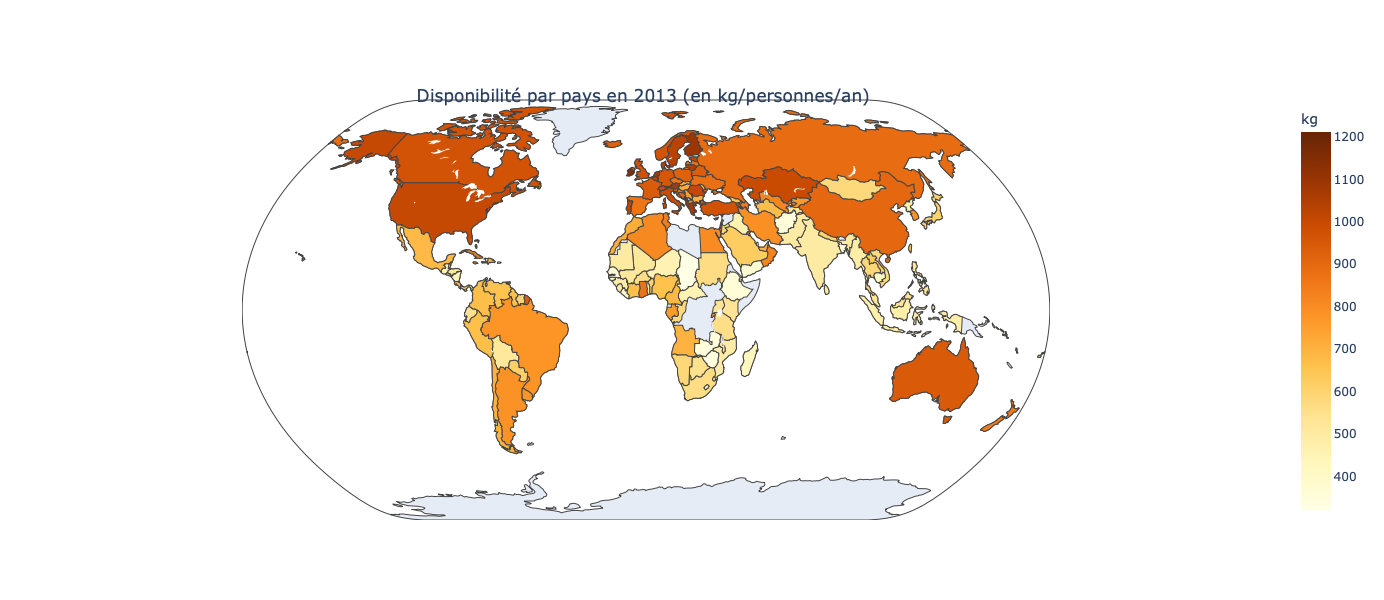

In [51]:
fig = px.choropleth(iso_dispo_alim, locations="CODE", 
              color="Disponibilité alimentaire en quantité (kg/personne/an)", 
              color_continuous_scale=px.colors.sequential.YlOrBr, 
              hover_name="Zone", 
              projection="natural earth",
              title="Disponibilité par pays en 2013 (en kg/personnes/an)")
fig.update_layout(coloraxis_colorbar_x=1.07)
fig.update_layout(title_x=0.465, title_y=0.85)
fig.update_layout(coloraxis_colorbar_title='kg')
fig.update_layout(width=900, height=600)
fig.add_layout_image(dict(
        source="logo_FAO.png",
        xref="paper", yref="paper",
        x=0.65, y=1.08,
        sizex=0.3, sizey=0.3,
        xanchor="right", yanchor="bottom"))

## ***Matière grasse***

### Représentation de la disponibilité de matière grasse par pays en 2013

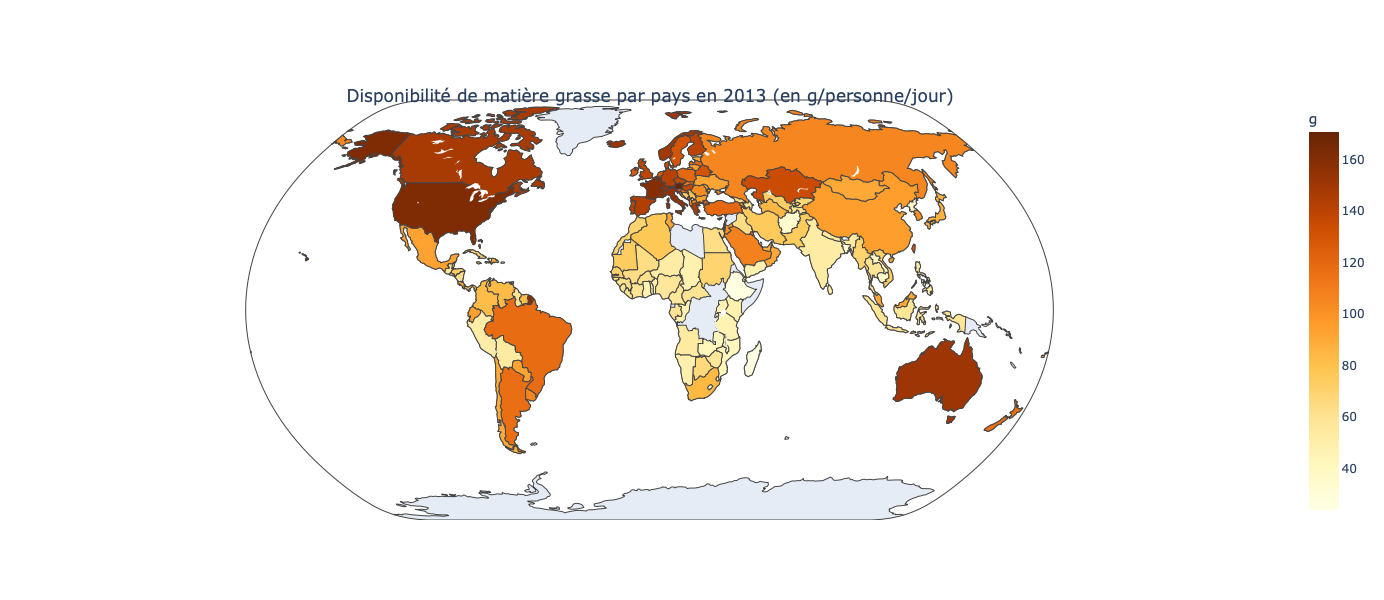

In [52]:
fig = px.choropleth(iso_dispo_alim, locations="CODE", 
              color="Disponibilité de matière grasse en quantité (g/personne/jour)", 
              color_continuous_scale=px.colors.sequential.YlOrBr, 
              hover_name="Zone", 
              projection="natural earth",
              title="Disponibilité de matière grasse par pays en 2013 (en g/personne/jour)")
fig.update_layout(coloraxis_colorbar_x=1.07)
fig.update_layout(title_x=0.47, title_y=0.85)
fig.update_layout(coloraxis_colorbar_title='g')
fig.update_layout(width=900, height=600)
fig.add_layout_image(dict(
        source="logo_FAO.png",
        xref="paper", yref="paper",
        x=0.65, y=1.08,
        sizex=0.3, sizey=0.3,
        xanchor="right", yanchor="bottom"))

## ***Protéines***

### Représentation de la disponibilité de protéines par pays en 2013

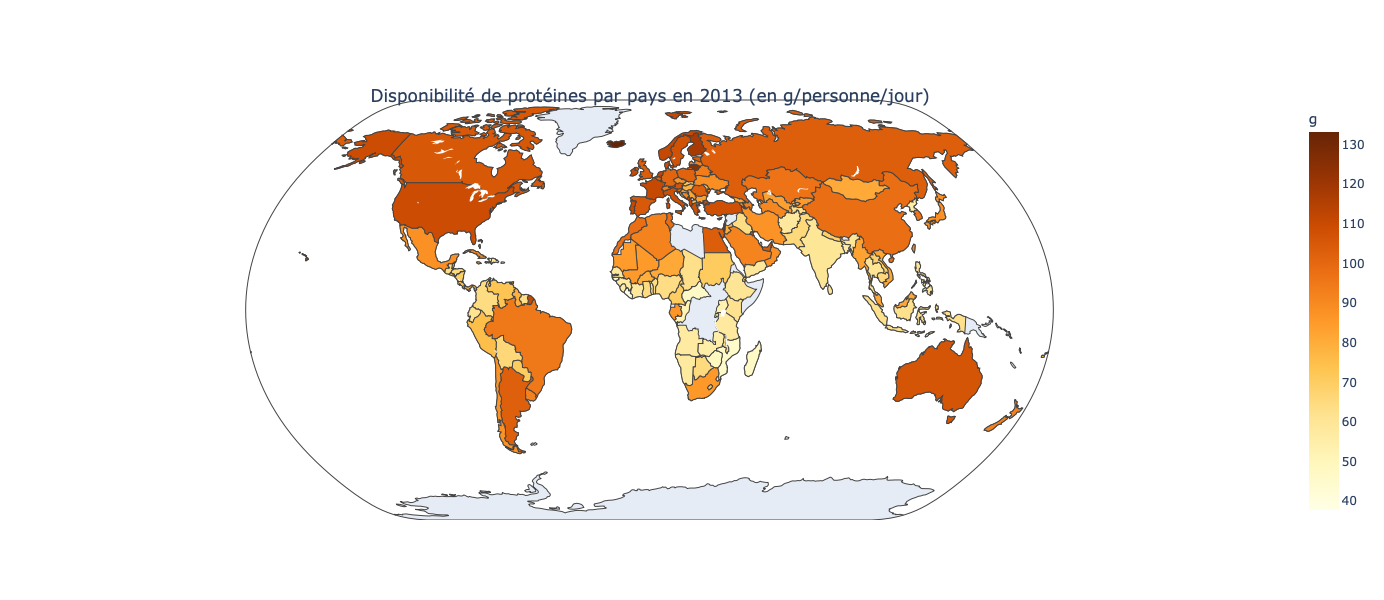

In [53]:
fig = px.choropleth(iso_dispo_alim, locations="CODE", 
              color="Disponibilité de protéines en quantité (g/personne/jour)", 
              color_continuous_scale=px.colors.sequential.YlOrBr, 
              hover_name="Zone", 
              projection="natural earth",
              title="Disponibilité de protéines par pays en 2013 (en g/personne/jour)")
fig.update_layout(coloraxis_colorbar_x=1.07)
fig.update_layout(title_x=0.47, title_y=0.85)
fig.update_layout(coloraxis_colorbar_title='g')
fig.update_layout(width=900, height=600)
fig.add_layout_image(dict(
        source="logo_FAO.png",
        xref="paper", yref="paper",
        x=0.65, y=1.08,
        sizex=0.3, sizey=0.3,
        xanchor="right", yanchor="bottom"))

# **Question 12** : Analyses complémentaires

## Aliments les plus disponibles en quantité dans le monde (2013)

In [54]:
dispo_alim_complet = dispo_alim.copy()
pop_sous_nut_2013 = pop_sous_nut[pop_sous_nut['Année'] == 2013].copy()

In [55]:
test_pk(pop_sous_nut_2013, ['Zone'])

La clé est unique


In [56]:
pop_sous_nut_dispo_alim = pop_sous_nut_2013.merge(dispo_alim_complet, how='inner', on='Zone')

In [57]:
top_15_alim = pop_sous_nut_dispo_alim.groupby(['Produit'])[ 'Disponibilité intérieure'].sum().nlargest(15)

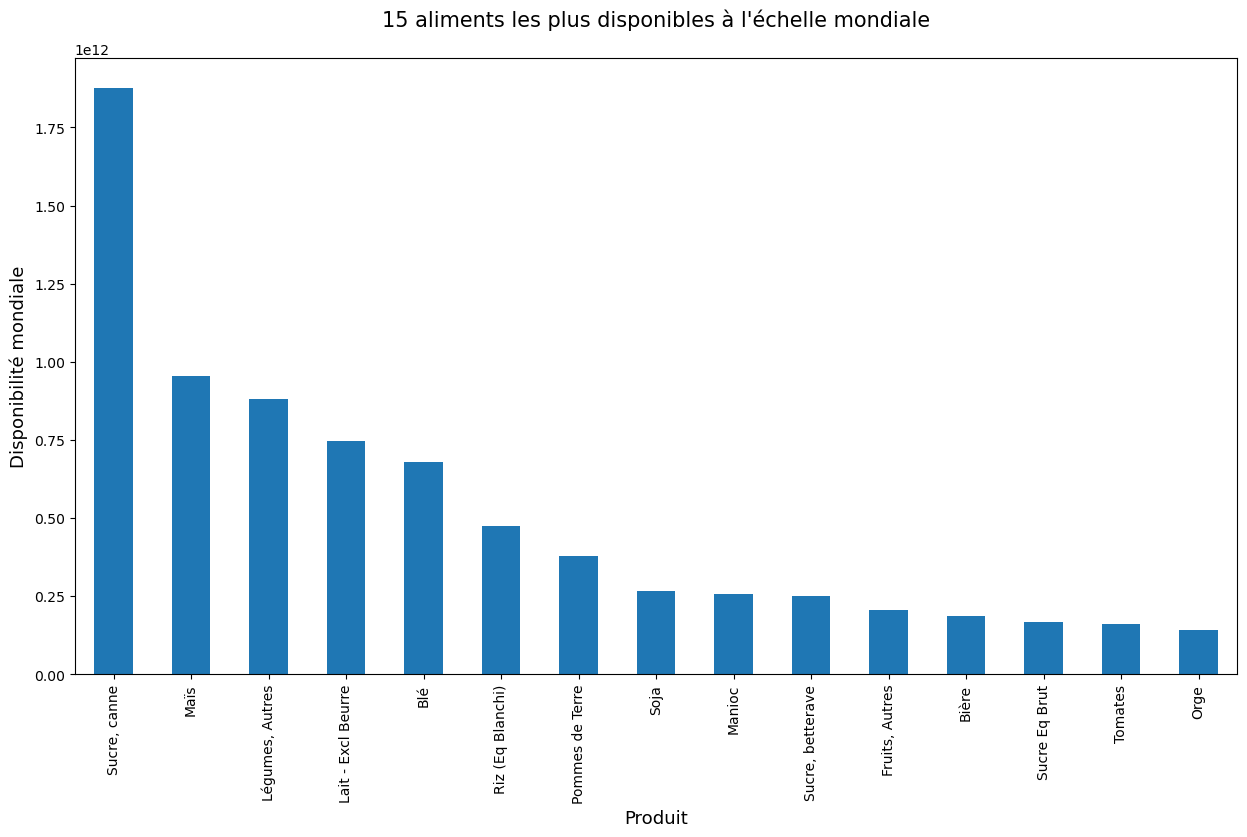

In [58]:
x = 'Produit'
y = "Disponibilité intérieure"
ax = top_15_alim.plot.bar(x, y, figsize=(15, 8))
ax.set_title("15 aliments les plus disponibles à l'échelle mondiale\n", fontsize=15)
ax.set_xlabel('Produit', fontsize=13)
ax.set_ylabel("Disponibilité mondiale", fontsize=13);

## Pays en sous-nutrition qui exportent plus que la moyenne mondiale (2013)

In [59]:
df = pop_sous_nut_dispo_alim.groupby(['Zone', 'Produit', 'Disponibilité intérieure', 
                                      'Proportion population en sous-nutrition']).sum()
df = df.sort_values(by=['Proportion population en sous-nutrition', 'Disponibilité intérieure'], ascending=False)
df = df.reset_index()
df = df.sort_values(by=['Proportion population en sous-nutrition', 'Disponibilité intérieure'], ascending=False)
df

Zone                   Produit  \
0                      Haïti              Sucre, canne   
1                      Haïti            Patates douces   
2                      Haïti          Riz (Eq Blanchi)   
3                      Haïti                   Ignames   
4                      Haïti                    Manioc   
...                      ...                       ...   
15327                 Canada          Céréales, Autres   
15328                Irlande     Aliments pour enfants   
15329               Pays-Bas     Aliments pour enfants   
15330                  Japon                    Avoine   
15331  États-Unis d'Amérique  Plantes Oleiferes, Autre   

       Disponibilité intérieure  Proportion population en sous-nutrition  \
0                 1200000000.00                                    49.04   
1                  603000000.00                                    49.04   
2                  459000000.00                                    49.04   
3                  425000000.00                                    49.04   
4                  418000000.00                                    49.04   
...                         ...                                      ...   
15327              -94000000.00                                     0.00   
15328             -105000000.00                                     0.00   
15329             -151000000.00                                     0.00   
15330             -159000000.00                                     0.00   
15331            -3430000000.00                                     0.00   

       Année   Population  Population en sous-nutrition  \
0       2013  10400675.00                    5100000.00   
1       2013  10400675.00                    5100000.00   
2       2013  10400675.00                    5100000.00   
3       2013  10400675.00                    5100000.00   
4       2013  10400675.00                    5100000.00   
...      ...          ...                           ...   
15327   2013  35296528.00                          0.00   
15328   2013   4615422.00                          0.00   
15329   2013  16843502.00                          0.00   
15330   2013 128314195.00                          0.00   
15331   2013 316400538.00                          0.00   

       Aliments pour animaux  Autres Utilisations  \
0               275000000.00                 0.00   
1                       0.00                 0.00   
2                       0.00                 0.00   
3                       0.00                 0.00   
4                47000000.00                 0.00   
...                      ...                  ...   
15327            18000000.00                 0.00   
15328                   0.00                 0.00   
15329                   0.00                 0.00   
15330            50000000.00           1000000.00   
15331                   0.00          36000000.00   

       Disponibilité alimentaire (Kcal/personne/jour)  ...  \
0                                                3.00  ...   
1                                              118.00  ...   
2                                              426.00  ...   
3                                               81.00  ...   
4                                               63.00  ...   
...                                               ...  ...   
15327                                            5.00  ...   
15328                                            0.00  ...   
15329                                            0.00  ...   
15330                                          -21.00  ...   
15331                                            0.00  ...   

       Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                   0.02               
1                                                   0.26               
2                                                   1.32               
3                                  

In [60]:
# création du DataFrame
exportations_mondiales = df.groupby('Zone')['Exportations - Quantité'].sum()
exportations_mondiales = pd.DataFrame(exportations_mondiales)
exportations_mondiales = exportations_mondiales.sort_values(by='Exportations - Quantité', ascending=False)
exportations_mondiales.sample(5)

Exportations - Quantité
Zone                                         
Iraq                             147000000.00
Saint-Kitts-et-Nevis               1000000.00
Costa Rica                      6291000000.00
Myanmar                         2669000000.00
Vanuatu                          118000000.00

In [61]:
# calcul de la moyenne mondiale des exportations
moyenne_exportations_mondiales = float(exportations_mondiales.mean())
moyenne_exportations_mondiales

7886105263.157895

In [62]:
exportations_mondiales = exportations_mondiales[
    exportations_mondiales['Exportations - Quantité'] > moyenne_exportations_mondiales]

In [63]:
# sélection des données sur la population en 2013
pop_sous_nut_2013 = pop_sous_nut[pop_sous_nut['Année'] == 2013].copy()

In [64]:
exp_mondiales_pop_sous_nut_2013 = exportations_mondiales.merge(pop_sous_nut_2013, on='Zone', how="inner")

In [65]:
proportion_pop_sous_nut_2013 = round(pop_sous_nut_2013['Population en sous-nutrition'].sum() / pop_sous_nut_2013['Population'].sum() * 100, 2)
print(bold + cyan + f"En 2013 la proportion de la population mondiale en sous-nutrition est de {proportion_pop_sous_nut_2013} %" + end)

En 2013 la proportion de la population mondiale en sous-nutrition est de 7.34 %


In [66]:
# création du DataFrame final des pays en sous-nutrition qui exportent plus que la moyenne mondiale en 2013
exp_mondiales_pop_sous_nut_2013 = exp_mondiales_pop_sous_nut_2013[
    exp_mondiales_pop_sous_nut_2013['Proportion population en sous-nutrition'] > proportion_pop_sous_nut_2013]

In [67]:
exp_mondiales_pop_sous_nut_2013

Zone  Exportations - Quantité  Année    Population  \
7     Thaïlande           50430000000.00   2013   68144518.00   
9          Inde           40807000000.00   2013 1280842125.00   
12    Indonésie           31912000000.00   2013  251805307.00   
19     Viet Nam           22638000000.00   2013   90752592.00   
28     Paraguay           10059000000.00   2013    6510276.00   
31     Pakistan            9256000000.00   2013  191260806.00   
35     Équateur            8002000000.00   2013   15707474.00   
36  Philippines            7897000000.00   2013   98871555.00   

    Population en sous-nutrition  Proportion population en sous-nutrition  
7                     6200000.00                                     9.10  
9                   203800000.00                                    15.91  
12                   22400000.00                                     8.90  
19                    8900000.00                                     9.81  
28                     500000.00                                     7.68  
31                   31100000.00                                    16.26  
35                    2300000.00                                    14.64  
36                   14500000.00                                    14.67

In [68]:
# création du DataFrame par jointure pour visualiser la carte
iso_exp_mondiales = iso.merge(exp_mondiales_pop_sous_nut_2013, how='inner', on='Zone')

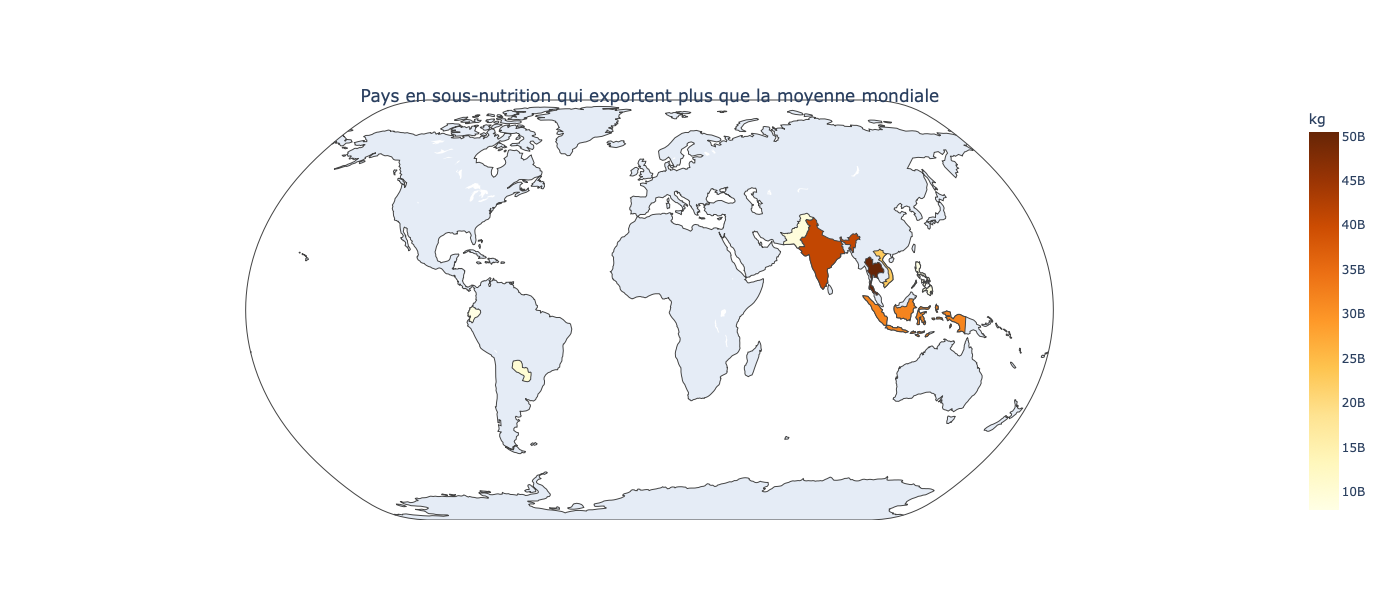

In [69]:
fig = px.choropleth(iso_exp_mondiales, locations="CODE", 
              color="Exportations - Quantité", 
              color_continuous_scale=px.colors.sequential.YlOrBr, 
              hover_name="Zone", 
              projection="natural earth",
              title="Pays en sous-nutrition qui exportent plus que la moyenne mondiale")
fig.update_layout(coloraxis_colorbar_x=1.07)
fig.update_layout(title_x=0.47, title_y=0.85)
fig.update_layout(coloraxis_colorbar_title='kg')
fig.update_layout(width=900, height=600)
fig.add_layout_image(dict(
        source="logo_FAO.png",
        xref="paper", yref="paper",
        x=0.65, y=1.08,
        sizex=0.3, sizey=0.3,
        xanchor="right", yanchor="bottom"))